10736


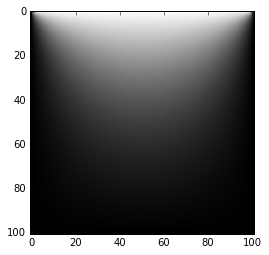

In [8]:
%matplotlib inline  
#Code adapted from Newman text
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

#import empty,zeros,max
#from pylab import imshow,gray,show

# Constants
M = 100         # Grid squares on a side
V = 1.0         # Voltage at top wall
target = 1e-6   # Target accuracy

# Create arrays to hold potential values
phi = np.zeros([M+1,M+1],float)
phi[0,:] = V
phiprime = np.empty([M+1,M+1],float)

# Main loop
delta = 1.0
ncount=0
while delta>target:

    # Calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] \
                                 + phi[i,j+1] + phi[i,j-1])/4

    # Calculate maximum difference from old values
    delta = np.max(abs(phi-phiprime))

    # Swap the two arrays around
    phi,phiprime = phiprime,phi
    ncount+=1
# Make a plot
print(ncount)
plt.imshow(phi)
plt.gray()
plt.show()


2368 9.99162300674e-07


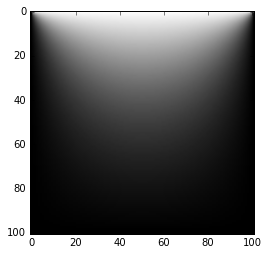

In [9]:
%matplotlib inline  
#Code adapted from Newman text, with over-relaxation and Gauss-Seidel
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

#import empty,zeros,max
#from pylab import imshow,gray,show

# Constants
M = 100         # Grid squares on a side
V = 1.0         # Voltage at top wall
target = 1e-6   # Target accuracy

# Create arrays to hold potential values
phi = np.zeros([M+1,M+1],float)
phi[0,:] = V
#phiprime = np.empty([M+1,M+1],float)

# Main loop
delta = 1.0
w=0.5
ncount=0
while delta>target:
    phiold=np.copy(phi)
    # Calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phi[i,j] = phi[i,j]
            else:
                phi[i,j] = (1.+w)*(phi[i+1,j] + phi[i-1,j] \
                                 + phi[i,j+1] + phi[i,j-1])/4 - w*phi[i,j]

    # Calculate maximum difference from old values
    delta = np.max(abs(phi-phiold))

    # Swap the two arrays around
    #phi,phiprime = phiprime,phi
    ncount+=1
# Make a plot
print(ncount, delta)
plt.imshow(phi)
plt.gray()
plt.show()

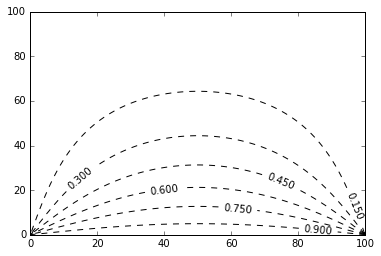

In [12]:
%matplotlib inline  
cont=plt.contour(phi, colors='black', linestyles='dashed')
plt.clabel(cont, inline=True, fontsize=10)
plt.show()